In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df=pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.shape

(14640, 15)

In [4]:
df.describe(include = 'O')

,airline_sentiment,negativereason,airline,airline_sentiment_gold,name,negativereason_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,14640,9178,14640,40,14640,32,14640,1019,14640,9907,9820
unique,3,10,6,3,7701,13,14427,832,14247,3081,85
top,negative,Customer Service Issue,United,negative,JetBlueNews,Customer Service Issue,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,9178,2910,3822,32,63,12,6,164,5,157,3744


# Data Preprocessing

Removing the tweets which have confidence level less than 50%

In [5]:
df=df.drop(df[df['airline_sentiment_confidence']<0.5].index,axis=0)
df.shape

(14404, 15)

In [6]:
X=df['text']
y=df['airline_sentiment']

In [7]:
X

0                      @VirginAmerica What @dhepburn said.
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
                               ...                        
14634           @AmericanAir right on cue with the delays👌
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14404, dtype: object

## EDA

In [8]:
sentiment = df.groupby('airline_sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
sentiment.style.background_gradient(cmap='Purples')

,airline_sentiment,text
0,negative,9115
1,neutral,2997
2,positive,2292


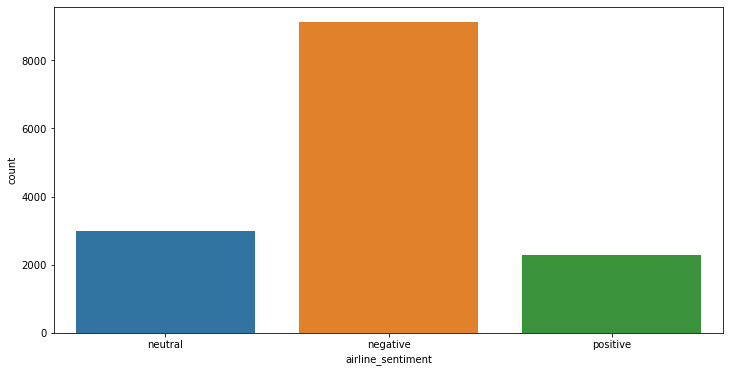

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='airline_sentiment',data=df)

## Data Cleaning

In [10]:
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
stop_words=stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jahnavi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jahnavi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Replacing symbols or non characters with blank space 

In [11]:
import re
cleaned_data=[]
for i in range(len(X)):
    tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])
    tweet=tweet.lower().split()
    tweet=[lemmatizer.lemmatize(word) for word in tweet if (word not in stop_words)]
    tweet=' '.join(tweet)
    cleaned_data.append(tweet)

In [12]:
cleaned_data

['virginamerica dhepburn said',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse',
 'virginamerica really big bad thing',
 'virginamerica seriously would pay flight seat playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm go away',
 'virginamerica really missed prime opportunity men without hat parody http co mwpg grezp',
 'virginamerica well',
 'virginamerica amazing arrived hour early good',
 'virginamerica know suicide second leading cause death among teen',
 'virginamerica lt pretty graphic much better minimal iconography',
 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia flying fabulous seductive sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thanks',
 'virginamerica sfo pdx schedule still mia',
 'virginamerica excited first cross country flight lax mc

In [13]:
y

0         neutral
2         neutral
3        negative
4        negative
5        negative
           ...   
14634    negative
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14404, dtype: object

In [14]:
sentiment_ordering = ['negative', 'neutral', 'positive']
#y = y.apply(lambda x: sentiment_ordering.index(x))

In [15]:
y

0         neutral
2         neutral
3        negative
4        negative
5        negative
           ...   
14634    negative
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14404, dtype: object

In [16]:
wordlist = []
for line in cleaned_data:
    words = line.split()
    wordlist.append(words)

In [17]:
temp = pd.DataFrame(cleaned_data)

In [18]:
temp

,0
0,virginamerica dhepburn said
1,virginamerica today must mean need take anothe...
2,virginamerica really aggressive blast obnoxiou...
3,virginamerica really big bad thing
4,virginamerica seriously would pay flight seat ...
...,...
14399,americanair right cue delay
14400,americanair leaving minute late flight warning...
14401,americanair please bring american airline blac...
14402,americanair money change flight answer phone s...


In [19]:
df_temp = df.join(temp)
df_temp

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,0
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica really aggressive blast obnoxiou...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica seriously would pay flight seat ...
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),virginamerica yes nearly every time fly vx ear...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),NaN


In [20]:
df_temp['temp_list'] = df_temp[0].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_temp['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,flight,4494
1,united,4035
2,usairways,2976
3,americanair,2908
4,southwestair,2362
5,jetblue,2290
6,get,1337
7,co,1164
8,http,1159
9,hour,1144


In [21]:
Positive_sent = df_temp[df_temp['airline_sentiment']=='positive']
Negative_sent = df_temp[df_temp['airline_sentiment']=='negative']
Neutral_sent = df_temp[df_temp['airline_sentiment']=='neutral']

In [22]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,flight,675
1,southwestair,547
2,jetblue,543
3,united,503
4,americanair,357
5,usairways,287
6,http,220
7,co,220
8,get,183
9,time,164


In [23]:
#MosT common Negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,flight,2906
1,united,2802
2,usairways,2253
3,americanair,2076
4,southwestair,1176
5,jetblue,1038
6,get,897
7,hour,823
8,cancelled,707
9,u,688


In [24]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,flight,913
1,united,730
2,jetblue,709
3,southwestair,639
4,americanair,475
5,usairways,436
6,co,306
7,http,305
8,get,257
9,thanks,254


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000,stop_words=['virginamerica','unit'])
X_fin=cv.fit_transform(cleaned_data).toarray()

In [26]:
X_fin.shape

(14404, 3000)

In [27]:
weights={}
# for index, weight in enumerate(class_weights) :
#    weights[index]=weight

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.3)

In [29]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [30]:
y_pred=model.predict(X_test)
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      2746
     neutral       0.58      0.50      0.54       890
    positive       0.68      0.67      0.68       686

    accuracy                           0.76      4322
   macro avg       0.70      0.68      0.69      4322
weighted avg       0.76      0.76      0.76      4322



[[2396  222  128]
 [ 359  445   86]
 [ 126   98  462]]


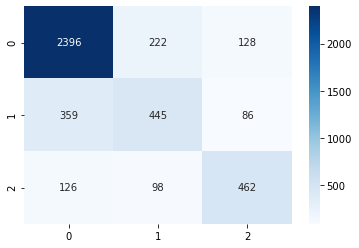

In [31]:
from sklearn.metrics import confusion_matrix
disp = confusion_matrix(y_test,y_pred,
                        labels=sentiment_ordering)
print(disp)

sns.heatmap(disp, annot=True,fmt='', cmap='Blues')

In [32]:
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.3)
model2.fit(X_train,y_train)

GaussianNB()

In [34]:
y_pred=model2.predict(X_test)
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

    negative       0.84      0.44      0.58      2754
     neutral       0.27      0.30      0.29       885
    positive       0.26      0.71      0.38       683

    accuracy                           0.46      4322
   macro avg       0.46      0.49      0.42      4322
weighted avg       0.63      0.46      0.49      4322



In [35]:
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression(solver='lbfgs')
model3.fit(X_train,y_train)

C:\Users\jahnavi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred=model3.predict(X_test)
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

    negative       0.85      0.88      0.87      2754
     neutral       0.61      0.58      0.59       885
    positive       0.77      0.70      0.73       683

    accuracy                           0.79      4322
   macro avg       0.74      0.72      0.73      4322
weighted avg       0.79      0.79      0.79      4322



[[2434  255   65]
 [ 295  512   78]
 [ 133   75  475]]


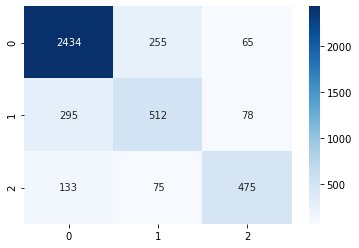

In [37]:
from sklearn.metrics import confusion_matrix
disp = confusion_matrix(y_test,y_pred,
                        labels=sentiment_ordering)
print(disp)

sns.heatmap(disp, annot=True,fmt='', cmap='Blues')

In [38]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=200)
model4.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [39]:
y_pred=model4.predict(X_test)
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

    negative       0.81      0.91      0.85      2754
     neutral       0.57      0.44      0.50       885
    positive       0.73      0.59      0.65       683

    accuracy                           0.76      4322
   macro avg       0.70      0.65      0.67      4322
weighted avg       0.75      0.76      0.75      4322



[[2496  186   72]
 [ 416  388   81]
 [ 175  102  406]]


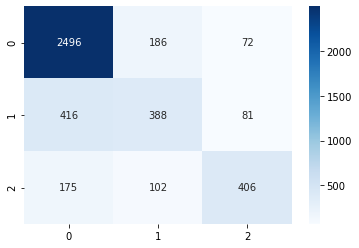

In [40]:
from sklearn.metrics import confusion_matrix
disp = confusion_matrix(y_test,y_pred,
                        labels=sentiment_ordering)
print(disp)

sns.heatmap(disp, annot=True,fmt='', cmap='Blues')